In [110]:
motiflogo_to_nicemotifname = {
    'A549': {
        'CCACYAGRKGGC': 'BORIS(Zf)/\nCTCFL',
        'NNATGASTCATN': 'Fra1',
        'RCCGGAARYG': 'Elk1',
        'AGAGGGCGCT': 'CTCF',
        #'GGGGGCGGGGCC': 'Sp1', probable gc bias
        'CTGTTTRC': 'Foxo1',
        'SCYYTARR': 'GIS1',
        'BCGCGGAR': 'SWI6',
        'GACGTCAC': 'TGA7',
        'CCAAWCGS': 'NFY',
        'TTAACCGC': 'Bgb::run',
        'GGRAGTGTTT': 'PU.1',
        'TTCGCTCCGS': 'MED-1',
        'TTGCGTAA': 'CEBPB',
        'CGGCGGCG': 'MA1034.1',
        'DGGAAWTTSC': 'NFkB-p65-Rel',
        'SSGCGCSSGCGC': 'NRF1',
        'VGGAGGAR': 'Znf263',
        #'CGRCGCGCGS': 'SWI6', #redundant SWI6
        'GTTGCCANRB': 'RFX1',
        'GCGCGGCGCCGC': 'Zfp161',
        'GGGAAAAAAA': 'kni' 
    },
    'H1ESC': {
        'CCACTAGGGGGC': 'BORIS(Zf)/\nCTCFL',
        #'GGGGGCGGGGCC': 'Sp1', #probable gc bias
        'ARVVVGCGBN': '	CTCF',
        'WAMCGCGS': 'MA0983.1',
        'BCGCTAGG': 'MA0396.1',
        'RGCCAATCGG': 'NFY',
        'BRYTTCCGSY': 'Elk1',
        'TTYCCCGCCC': 'E2F7',
        'CTGCGCATGCGC': 'NRF',
        'TGCAAATC': 'Oct4',
        'AAGCTTTC': 'Dof2',
        'ACATTCCY': 'TEAD4',
        'ATAACAAAGG': 'Sox2'       
    },
    'HepG2': {
        'CCACTAGRGGGC': 'BORIS(Zf)/\nCTCFL',
        'TGRACTTTGNMC': 'HNF4G',
        'GATGAGTCAT': 'AP-1',
        'CCAAWCRG': 'NFY',
        #'Sp1': 'GCCCCGCCCC', probably GC bias
        'ACATTCCG': 'LYS14',
        'GYNAVHSDNY':'MA1083.1',
        'TTACGYAACM': 'MA0447.1',
        'CTTAGAGC':'XBP1',
        'CCTTTCRG':'MA0207.1',
        'KTTDCMAMNS':'CEBP:AP1'
    }
}


HepG2
backpropmethods


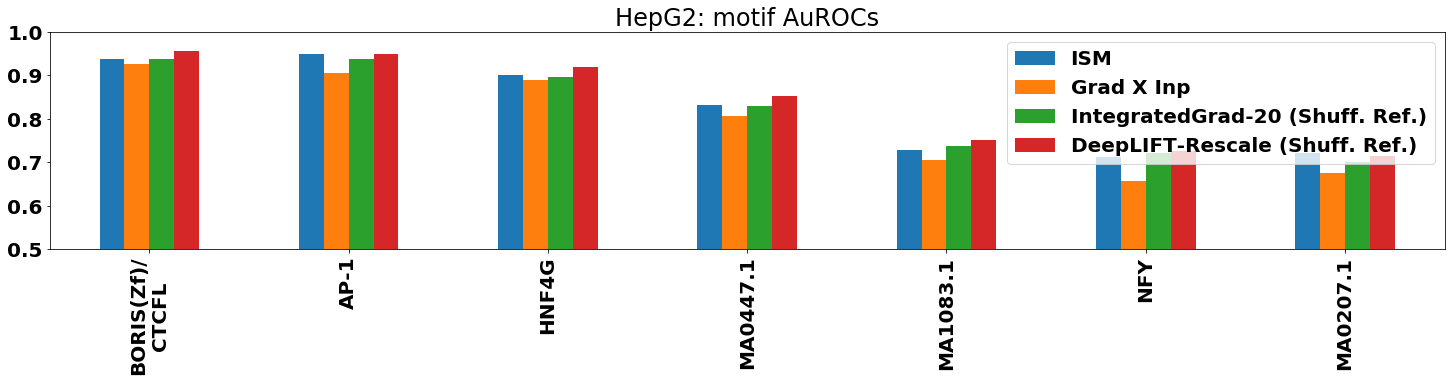

deepliftreference


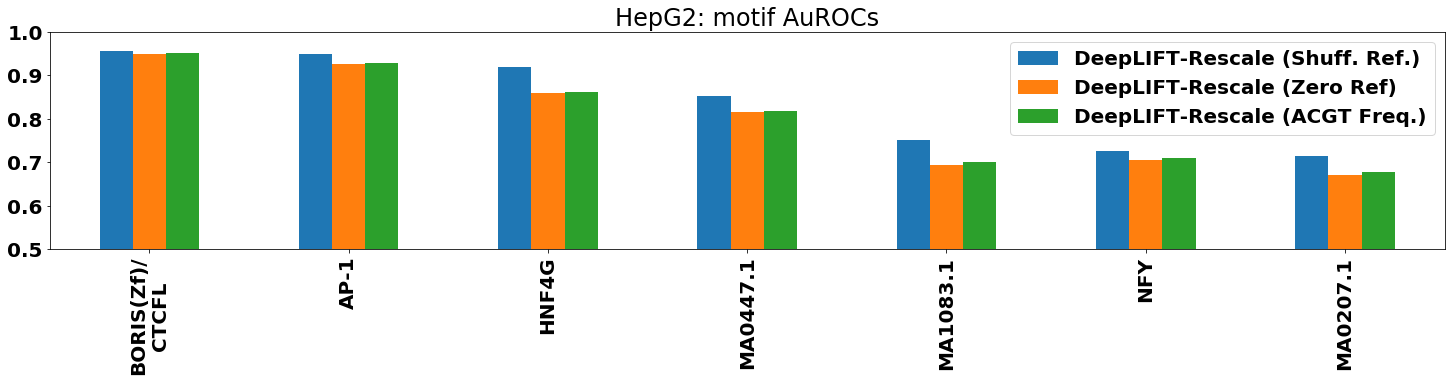

igreference


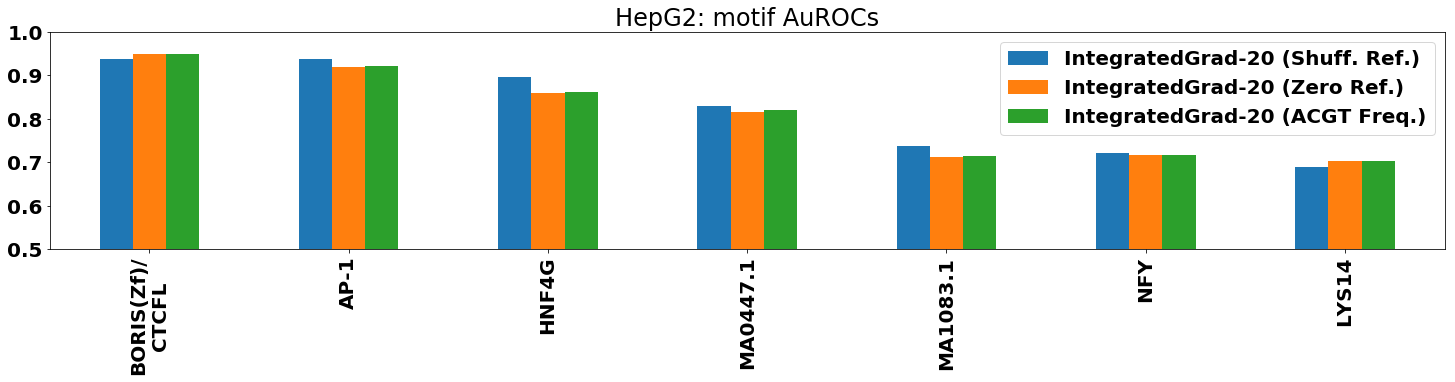

numref_ig


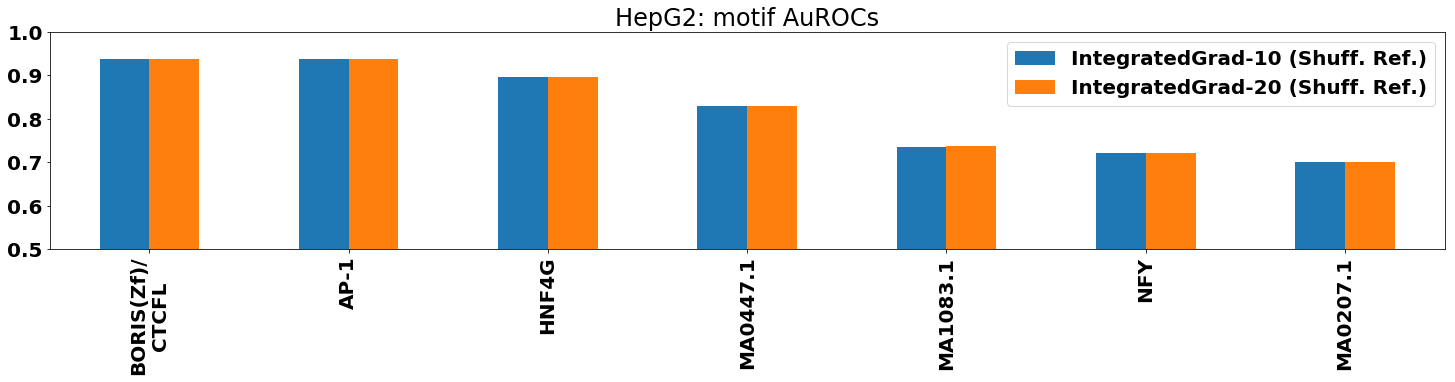

rescalevrc


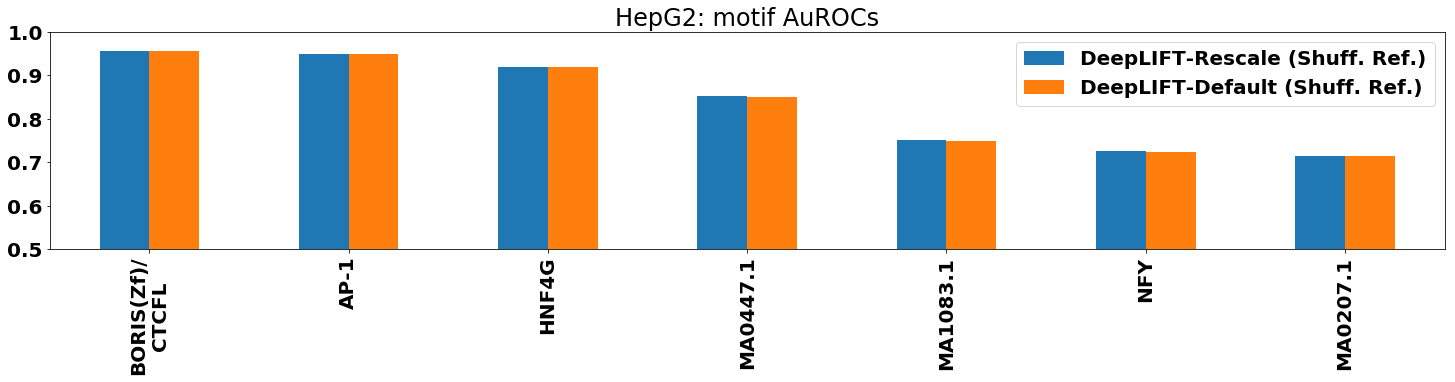

H1ESC
backpropmethods


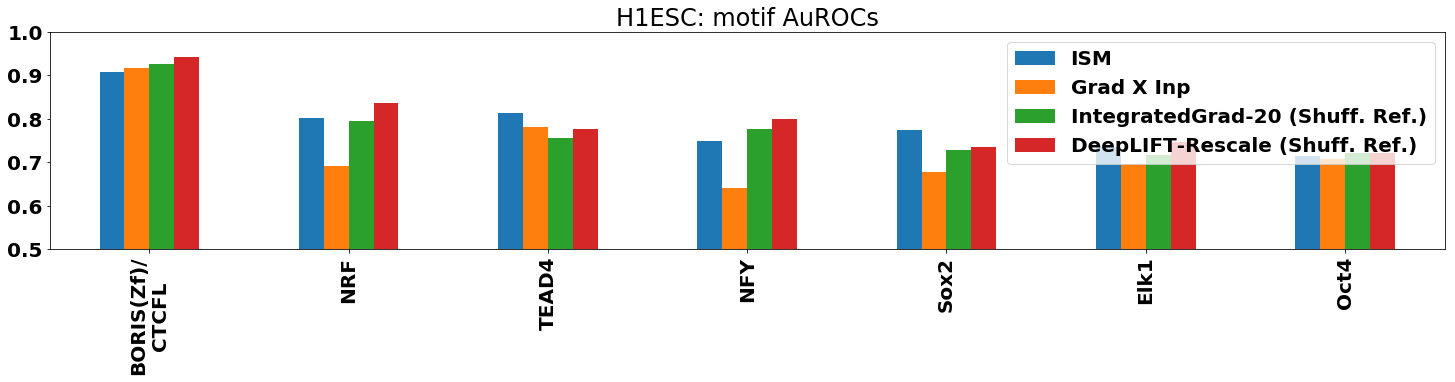

deepliftreference


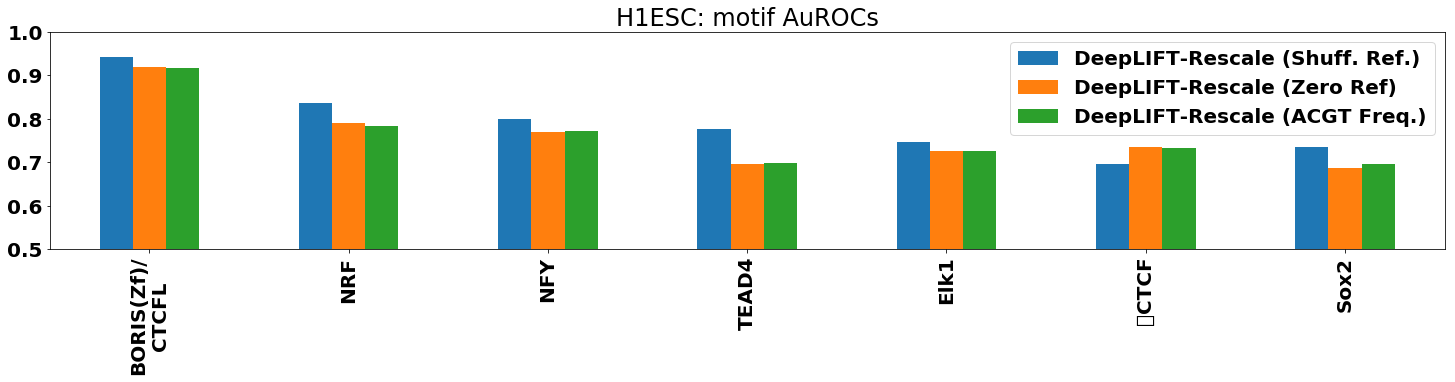

igreference


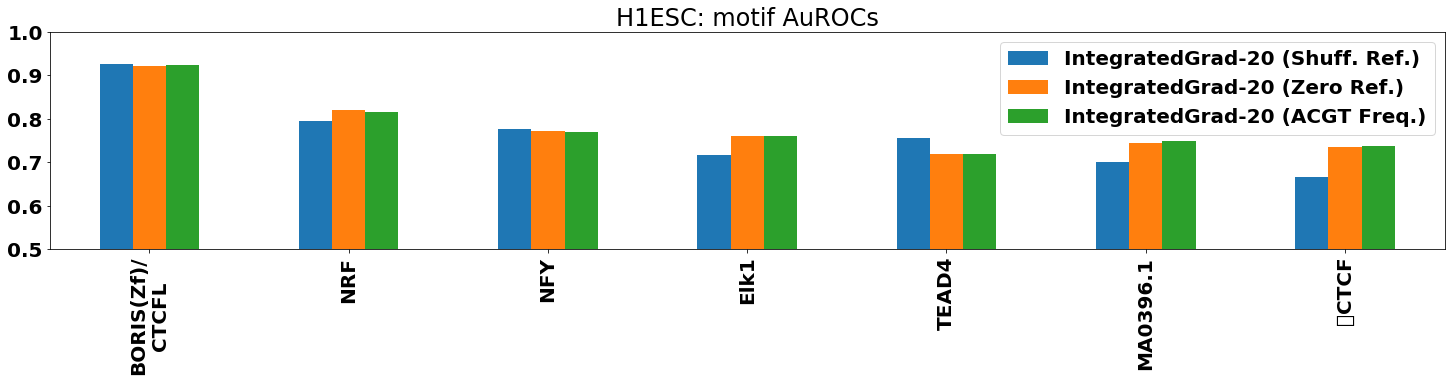

numref_ig


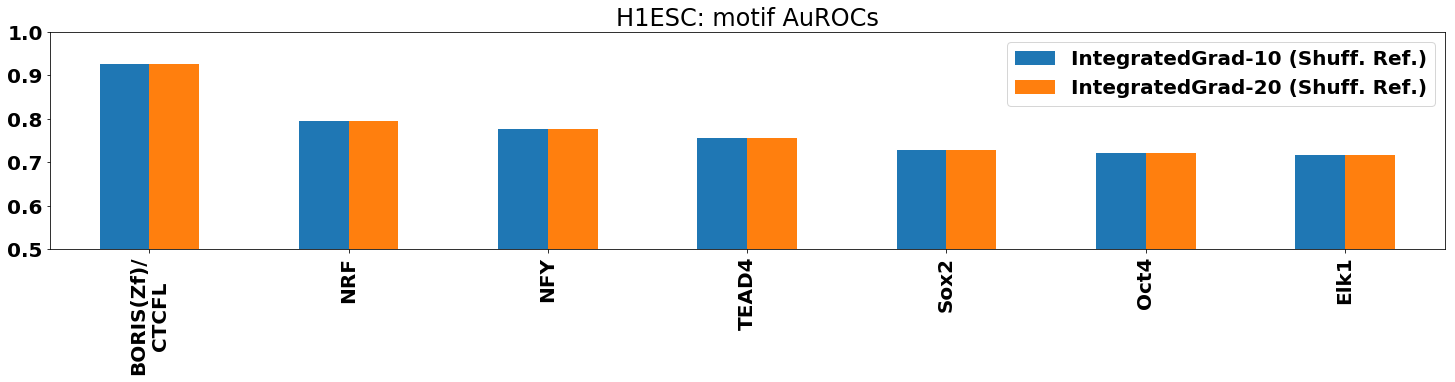

rescalevrc


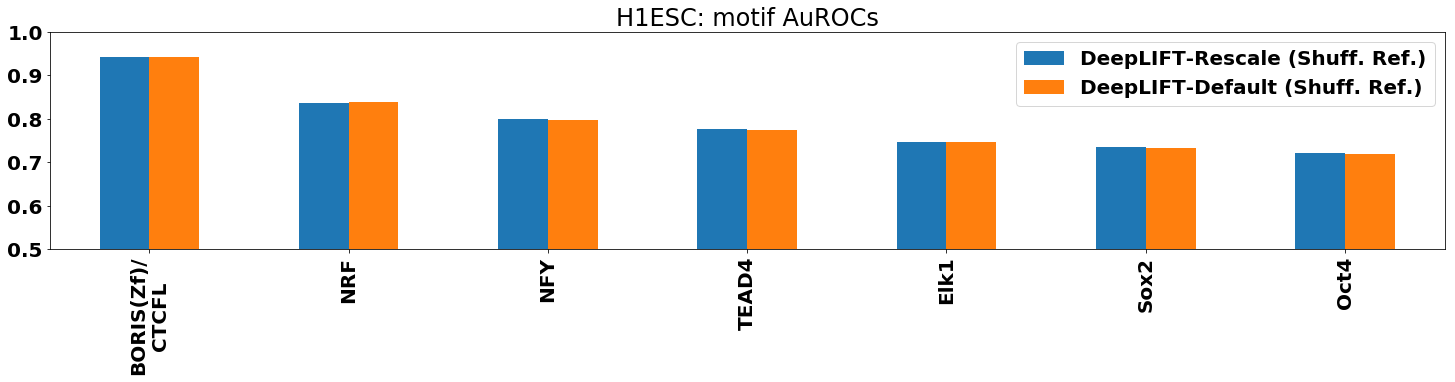

A549
backpropmethods


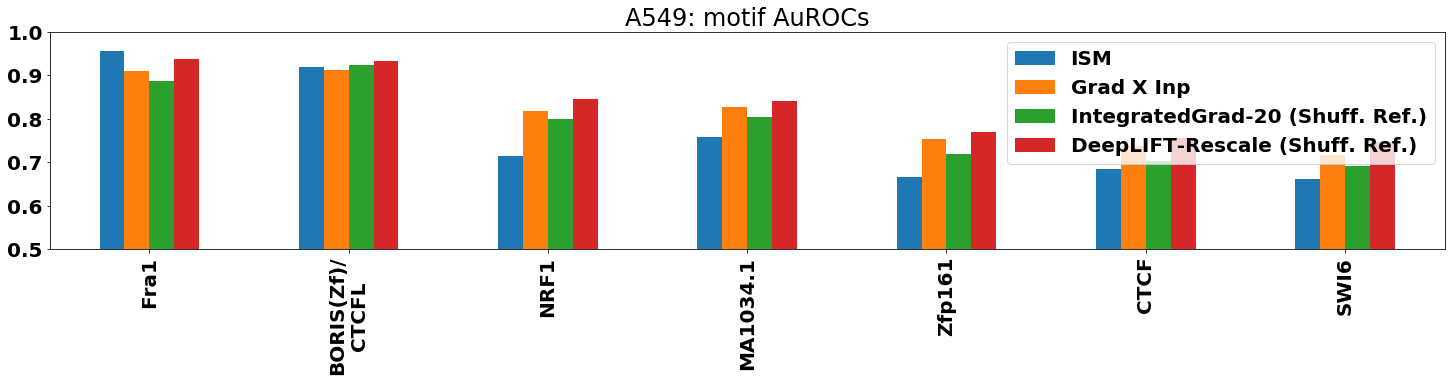

deepliftreference


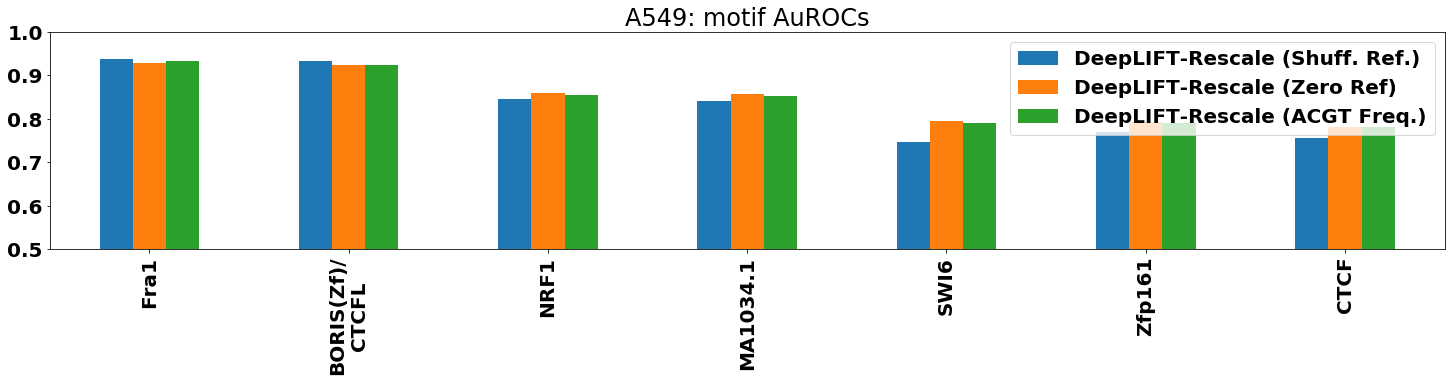

igreference


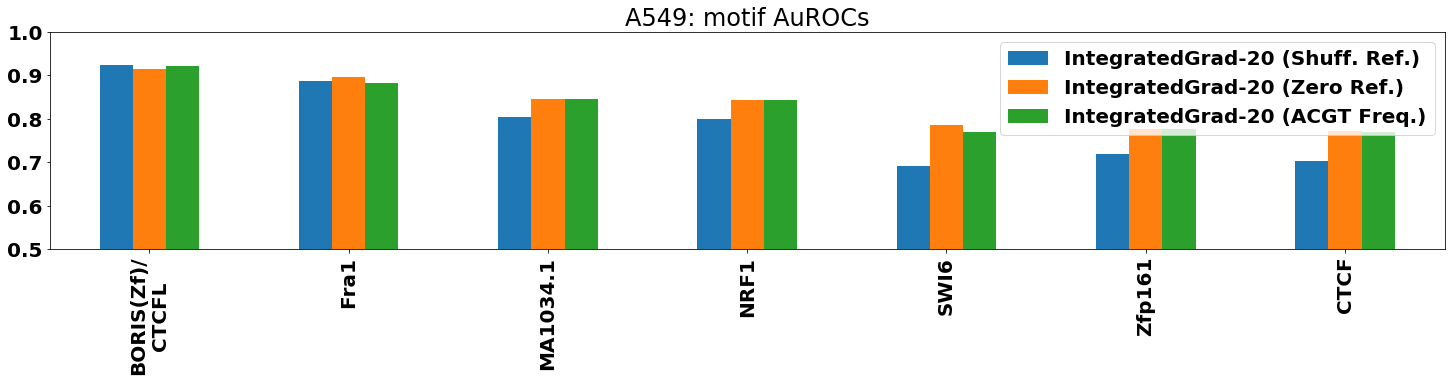

numref_ig


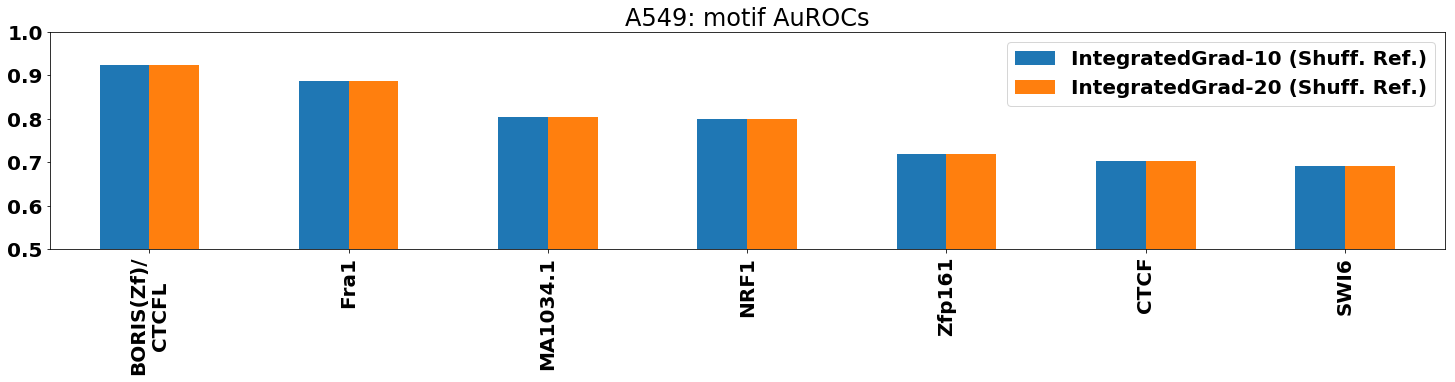

rescalevrc


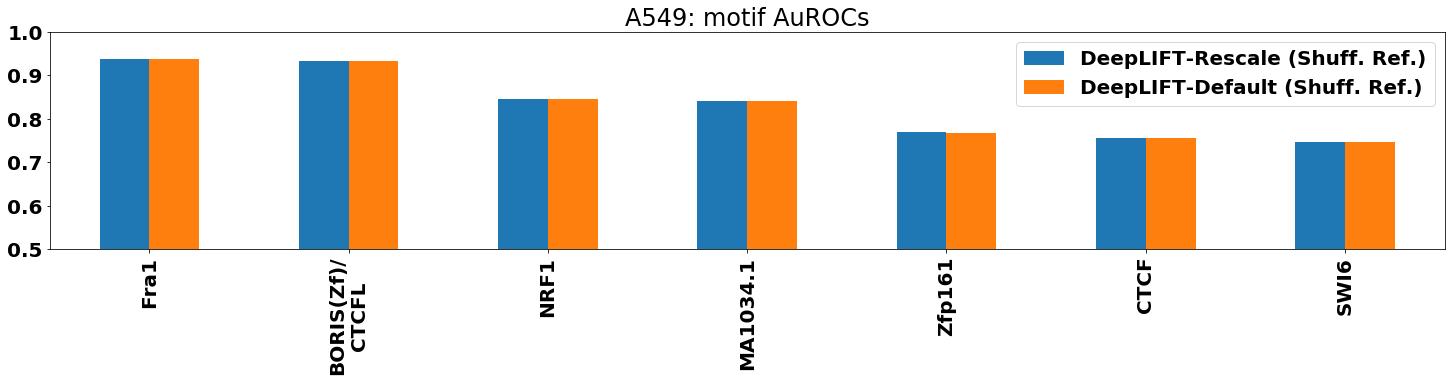

In [114]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
import json
import gzip
import pandas

methodgroupname_to_methodnames = {
    'backpropmethods': [
        'ism',
        'gradtimesinp',
        'intgrad20_dinucshuffref10',
        'dlrescale_dinucshuffref10'],
    'deepliftreference': [
        'dlrescale_dinucshuffref10',
        'dlrescale_zeroref',
        'dlrescale_gcref'
    ],
    'igreference': [
        'intgrad20_dinucshuffref10',
        'intgrad20_zeroref',
        'intgrad20_gcref'
    ],
    'rescalevrc': [
        'dlrescale_dinucshuffref10',
        'dldefault_dinucshuffref10'
    ],
    'numref_ig': [
        'intgrad10_dinucshuffref10',
        'intgrad20_dinucshuffref10']
}

method_to_nicename = {
    'ism': 'ISM',
    'gradtimesinp': 'Grad X Inp',
    'intgrad20_dinucshuffref10': 'IntegratedGrad-20 (Shuff. Ref.)',
    'intgrad20_zeroref': 'IntegratedGrad-20 (Zero Ref.)',
    'intgrad20_gcref': 'IntegratedGrad-20 (ACGT Freq.)',
    'intgrad10_dinucshuffref10': 'IntegratedGrad-10 (Shuff. Ref.)',
    'dlrescale_dinucshuffref10': 'DeepLIFT-Rescale (Shuff. Ref.)',
    'dldefault_dinucshuffref10': 'DeepLIFT-Default (Shuff. Ref.)',
    'dlrescale_zeroref': 'DeepLIFT-Rescale (Zero Ref)',
    'dlrescale_gcref': 'DeepLIFT-Rescale (ACGT Freq.)'
}

celltypes = ['HepG2', 'H1ESC', 'A549']
#celltypes = ['HepG2']
methodgroups = ['backpropmethods','deepliftreference','igreference','numref_ig','rescalevrc']
for celltype in celltypes:
    print(celltype)
    motifscoring_results = json.loads(
        gzip.open(celltype+"_motifscoring_results.json.gz").read())
    motifname_to_hitlocations = motifscoring_results['motifname_to_hitlocations']
    motifname_to_method_to_hitscores = motifscoring_results['motifname_to_method_to_hitscores']
    motifname_to_method_to_auroc = motifscoring_results['motifname_to_method_to_auroc']
    motifname_to_method_to_auprc = motifscoring_results['motifname_to_method_to_auprc']
    motifname_to_numhits = motifscoring_results['motifname_to_numhits']
    motifname_to_baselineauprc = motifscoring_results['motifname_to_baselineauprc']
    
    motifname_to_method_to_perf = motifname_to_method_to_auroc
    
    motifnames = list(motiflogo_to_nicemotifname[celltype].keys())
    for methodgroup in methodgroups:
        print(methodgroup)
        methodnames = methodgroupname_to_methodnames[methodgroup]
        #order the motifs by their max perf
        subset_motifnames = [x[0] for x in sorted([(motifname,
                                         max([motifname_to_method_to_perf[motifname][methodname]
                                         for methodname in methodnames]))
                                        for motifname in motifnames],
                                       key=lambda x: -x[1])][:7]
        
        df_contents = {}
        for methodname in methodnames:
            df_contents[method_to_nicename[methodname]] = [
                motifname_to_method_to_perf[motifname][methodname]
                 for motifname in subset_motifnames]
        df = pandas.DataFrame(df_contents,
                              index=[motiflogo_to_nicemotifname[celltype][x]
                                     for x in subset_motifnames])
        
        #for one in a slide, do figsize (17,10)
        #for three, do (25,4)
        ax = df.plot.bar(rot=90, figsize=(25,4))
        ax.set_ylim(0.5,1.0)
        ax.set_title(celltype+": motif AuROCs")
        plt.show()

In [41]:
motifname_to_method_to_hitscores['CCACYAGRKGGC'].keys()

dict_keys(['dldefault_dinucshuffref10', 'dlrescale_dinucshuffref10', 'dlrescale_gcref', 'dlrescale_zeroref', 'gradtimesinp', 'intgrad10_dinucshuffref10', 'intgrad10_gcref', 'intgrad10_zeroref', 'intgrad20_dinucshuffref10', 'intgrad20_gcref', 'intgrad20_zeroref', 'ism'])